In [1]:
import numpy as np

from load_data_mongoloids import load_data_mongoloids
from mongoloids_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config

from transform_data import *
import time
import matplotlib
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats

from configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 70
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
 'axes.labelsize': fontsize,
 'axes.titlesize':fontsize,
 'xtick.labelsize':fontsize,
 'ytick.labelsize':fontsize}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 
plt.style.use('ggplot')
%matplotlib inline

In [3]:
top_thr_cpg_genes_path = config.ofname([["top_thr_corr_graph"], ["top_thr_corr_graph_not_in_list_cpgs"]], ext = ".txt", include_set = config.params_sets["diff_graph"])
#genes_names = np.genfromtxt(top_thr_cpg_genes_path, dtype='str', usecols = 0)
#cpg_names = np.genfromtxt(top_thr_cpg_genes_path, dtype='str', usecols = 1)
#beta = np.genfromtxt(top_thr_cpg_genes_path, dtype='float32', delimiter=' ')[:, 2:]

import pandas as pd
top_thr_cpg_genes_df = pd.read_csv(top_thr_cpg_genes_path, sep=' ', header=None)

genes_names = top_thr_cpg_genes_df[0].drop_duplicates()
#print genes_names

for i, gene_name in enumerate(genes_names):
    print gene_name
    df = top_thr_cpg_genes_df[top_thr_cpg_genes_df[0] == gene_name]
    df = df.drop(0, axis = 1)
    top_thr_cpg_gene_path = config.ofname([["top_thr_corr_graph"], ["cpg_per_gene_not_in_list"], ["cpg_gene_" + gene_name]], ext = ".txt", include_set = config.params_sets["diff_graph"])
    df.to_csv(top_thr_cpg_gene_path, sep='\t', header = False, index = False)
    

PTPN3
SOX10
CENPBD1
FBXO25
PAQR8
LPPR4
KIF13B
TCF21
APBB3
ATAD3A
C10orf32
TMEM145
PAQR6
UBE2QL1
SNX31
FREM3
DNAL1
SLC4A3
ZNF555
SNX9
TMOD1
RIMBP3
MUC20
BRAF
PCIF1
BHLHA15
COX4I2
QRFPR
FTHL3
IHH
ARHGEF18
KLK4
B3GNT4
C1orf65
CPXM1
KIF6
RGPD8
PITX3
BARHL1
SLC34A1
GLTPD1
RGPD5
PHACTR3
FRAS1
KCNQ3
KIF22
SH3RF1
DLGAP3
ALDH16A1
CNTFR
NUBP1
ZDHHC17
EOMES
FLJ26850
SEMA3F
PCDH24
C4orf12
PCDHB17
ZNF596
STUB1
ATP8B3
SMAD5OS
CTNNA1
EZH1
AKR7L
SDC4
PTPN9
LOC595101
C13orf18
FLJ45983
RRS1
CYP24A1
TMEFF2
NSUN7
LHFPL5
ATPIF1
APCDD1L
ENTPD2
FAM110C
LOC651250
SPINT2
P2RX5
LOC25845
GATSL2
GLTPD2
LOC402778
FRAT2
MYADML
IFNAR2
C1orf213
LOC148824
C6orf162
NUDT4P1
NOVA2
SNORD1C
CAMK2N2
C17orf53
CCDC136
DPYSL3
CCDC37
CMBL
ZNF347
TUBA8
MAPRE3
C14orf38
SNTB2
KRT19
HYMAI
TTC16
NXPH2
MRPS34
TAS1R3
GBAS
RAC3
SLC25A16
HIST1H2BM
C3orf17
PRRX1
C17orf65
C10orf82
MIR433
CYP4F22
CYP4X1
ANO5
PDK1
GNB1L
C9orf37
ERGIC1
MAPK8IP1
MBTPS1
STX4
GMNN
RBM46
CCDC151
LOC441208
PLA2G7
FAM69A
TGFB3
PSD2
YTHDC1
TRANK1
ODF2L
TIMM50
C15or

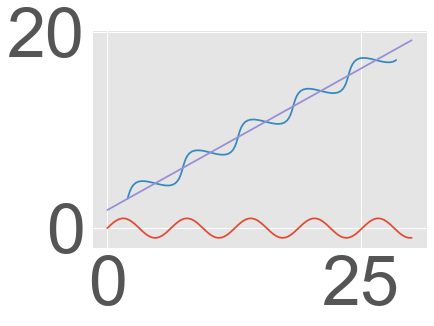

In [60]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt 

fig=plt.figure() 
#ax = fig.add_axes()
x = np.linspace(0, 30, 100)
y = np.sin(x)

x0 = 2
y0 = 3
alpha = np.pi * 30 / 180

x1 = x0 + x * np.cos(alpha) - y * np.sin(alpha)
y1 = y0 + x * np.sin(alpha) + y * np.cos(alpha)

plt.plot(x, y)
plt.plot(x1, y1)


plt.plot(x, np.tan(alpha) * (x - x0) + y0)
# for rotate the axes and update. 
 